<a href="https://colab.research.google.com/github/booorayan/unsupervised_in_r/blob/master/UnsuperviseR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

In [2]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [50]:
install.packages("plyr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [4]:
install.packages("DataExplorer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘igraph’, ‘gridExtra’, ‘networkD3’



In [5]:
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [47]:
install.packages("ggbiplot")
install.packages("devtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message:
“package ‘ggbiplot’ is not available (for R version 3.6.1)”Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [54]:
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


## Importing Libraries

In [6]:
library(data.table)
library(dplyr)
library(ggplot2)
library(tidyr)
library(DataExplorer)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Loading the Dataset

In [7]:
# reading the csv file and storing it in a variable
ecommerce <- read.csv("http://bit.ly/EcommerceCustomersDataset",)

# previewing the first five observations in the dataset
head(ecommerce, 5)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20        0.20      0         
2  2              64.000000              0.00        0.10      0         
3  1              -1.000000              0.20        0.20      0         
4  2               2.666667              0.05        0.14      0         
5 10             627.500000              0.02        0.05      0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE

In [8]:
# previewing the last five observations in the dataset
tail(ecommerce, 5)

Administrative Administrative_Duration Informational
12326 3              145                     0            
12327 0                0                     0            
12328 0                0                     0            
12329 4               75                     0            
12330 0                0                     0            
      Informational_Duration ProductRelated ProductRelated_Duration BounceRates
12326 0                      53             1783.792                0.007142857
12327 0                       5              465.750                0.000000000
12328 0                       6              184.250                0.083333333
12329 0                      15              346.000                0.000000000
12330 0                       3               21.250                0.000000000
      ExitRates  PageValues SpecialDay Month OperatingSystems Browser Region
12326 0.02903061 12.24172   0          Dec   4                6       1     
12327 0.02133333  0.00000   0          Nov   3                2       1     
12328 0.08666667  0.00000   0          Nov   3                2       1     
12329 0.02105263  0.00000   0          Nov   2                2       3     
12330 0.06666667  0.00000   0          Nov   3                2       1     
      TrafficType VisitorType       Weekend Revenue
12326  1          Returning_Visitor  TRUE   FALSE  
12327  8          Returning_Visitor  TRUE   FALSE  
12328 13          Returning_Visitor  TRUE   FALSE  
12329 11          Returning_Visitor FALSE   FALSE  
12330  2          New_Visitor        TRUE   FALSE

In [9]:
# getting a glimpse/overview of the data
glimpse(ecommerce)


Observations: 12,330
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <fct> Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, …
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser        

The dataset has 12,330 observations and 18 features/variables



In [10]:
# checking the dimensions of the the dataframe
dim(ecommerce)

[1] 12330    18

In [11]:
# confirming if the class of ecommerce is a dataframe
class(ecommerce)

[1] "data.frame"

In [12]:
summary(ecommerce[, c(1:10,12:15)])

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

Summary output reveals columns 1:8 have missing values. There is also a notable variance in mean of the features, which may necessitate scaling. 

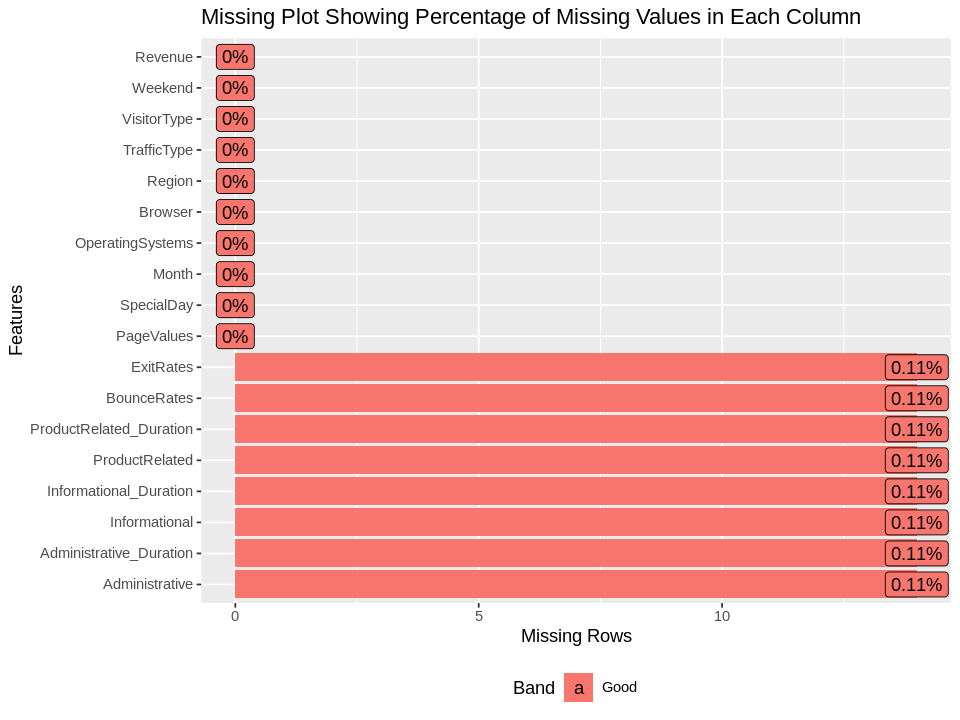

In [13]:
# Using the dataexplorer package to check for missing values in the dataset
options(repr.plot.width=8, repr.plot.height=6)  # defining the size of plots

plot_missing(ecommerce, title="Missing Plot Showing Percentage of Missing Values in Each Column")

Considering the size of the dataset and the plot for missing values, we can remove the missing values and not lose significant information from the dataset

In [14]:
# checking for presence of missing values
print(any(is.na(ecommerce)))

# checking for sum of missing values 
miss_val <- sum(is.na(ecommerce))
miss_val

[1] TRUE


[1] 112

Dataframe has 112 missing values

In [15]:
# removing missing data
commerce <- na.omit(ecommerce)

# looking at the dimension of the dataset after removing missing values
dim(commerce)
glimpse(commerce)

[1] 12316    18

Observations: 12,316
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <fct> Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, …
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser        

We remove missing values because they constitute a very small percentage of the total data. Removing them will not result in a great lose of information.

In [16]:
# converting column names to lower case for uniformity 
colnames(commerce) <- tolower(colnames(commerce))

# confirming change has been effected
colnames(commerce)

[1] "administrative"          "administrative_duration"
 [3] "informational"           "informational_duration" 
 [5] "productrelated"          "productrelated_duration"
 [7] "bouncerates"             "exitrates"              
 [9] "pagevalues"              "specialday"             
[11] "month"                   "operatingsystems"       
[13] "browser"                 "region"                 
[15] "traffictype"             "visitortype"            
[17] "weekend"                 "revenue"

In [17]:
summary(commerce[, c(1:10,12:15)])

 administrative   administrative_duration informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 informational_duration productrelated   productrelated_duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
  bouncerates         exitrates         pagevalues        specialday    
 Min.   :0.000000   Min.   :0.00000   Min.   :  0.000   Min

There are no missing values in the resulting dataframe

In [18]:
# checking for duplicate data in the dataframe
dup_rows <- commerce[duplicated(commerce,),]
dim(dup_rows)

[1] 117  18

117 rows in the dataframe are duplicate data.

In [19]:
# removing duplicate data
dup.free <- commerce[!duplicated(commerce,),]
dim(dup.free)

[1] 12199    18

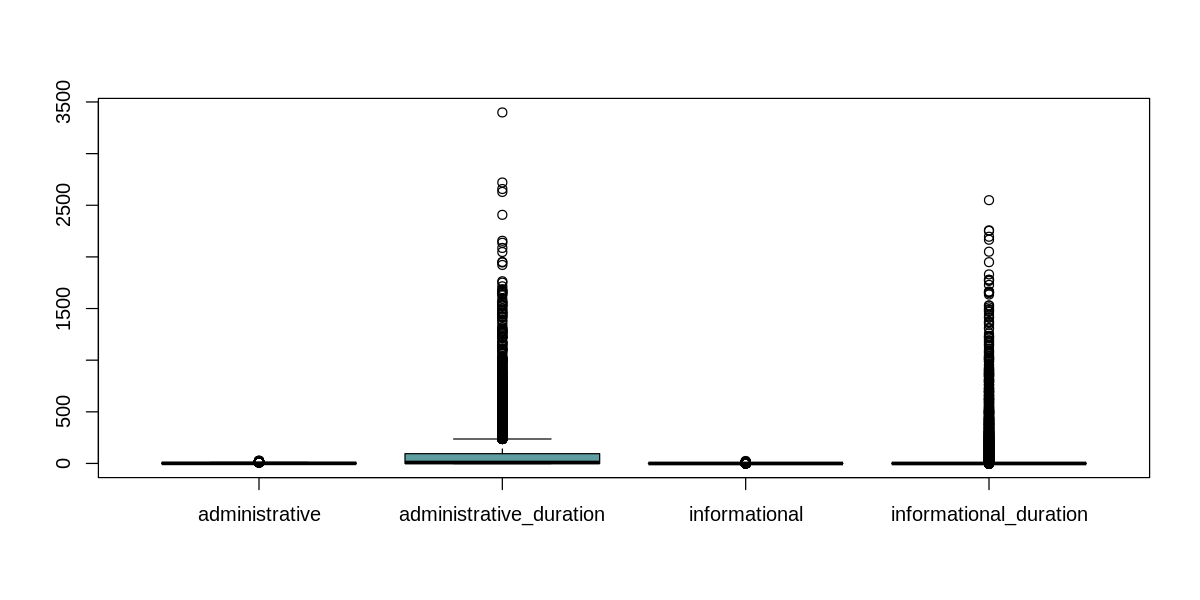

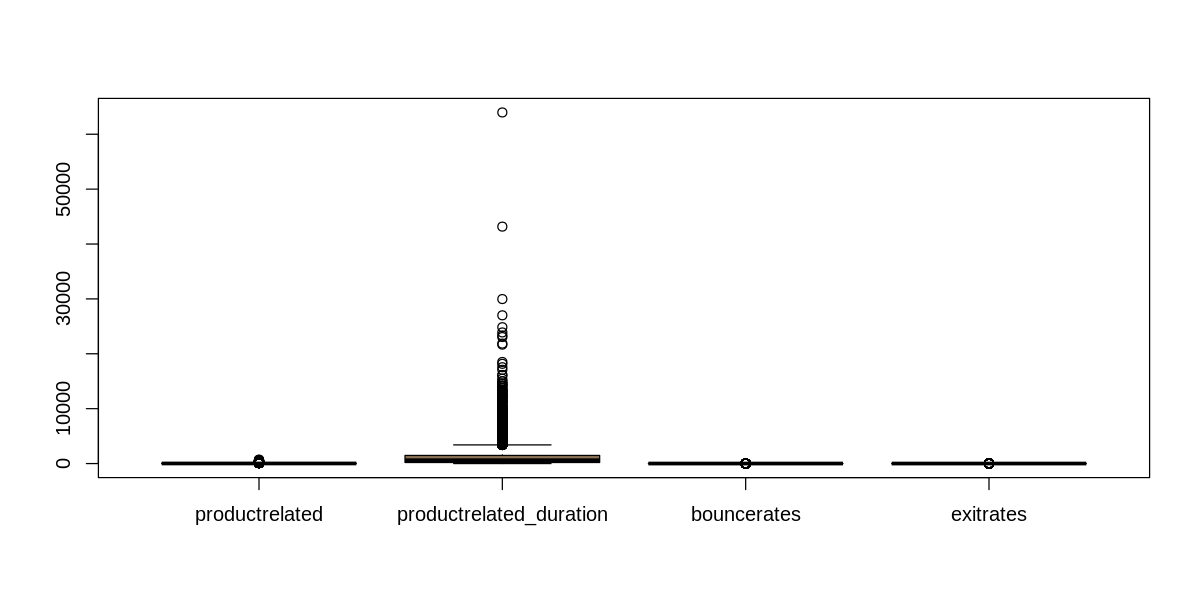

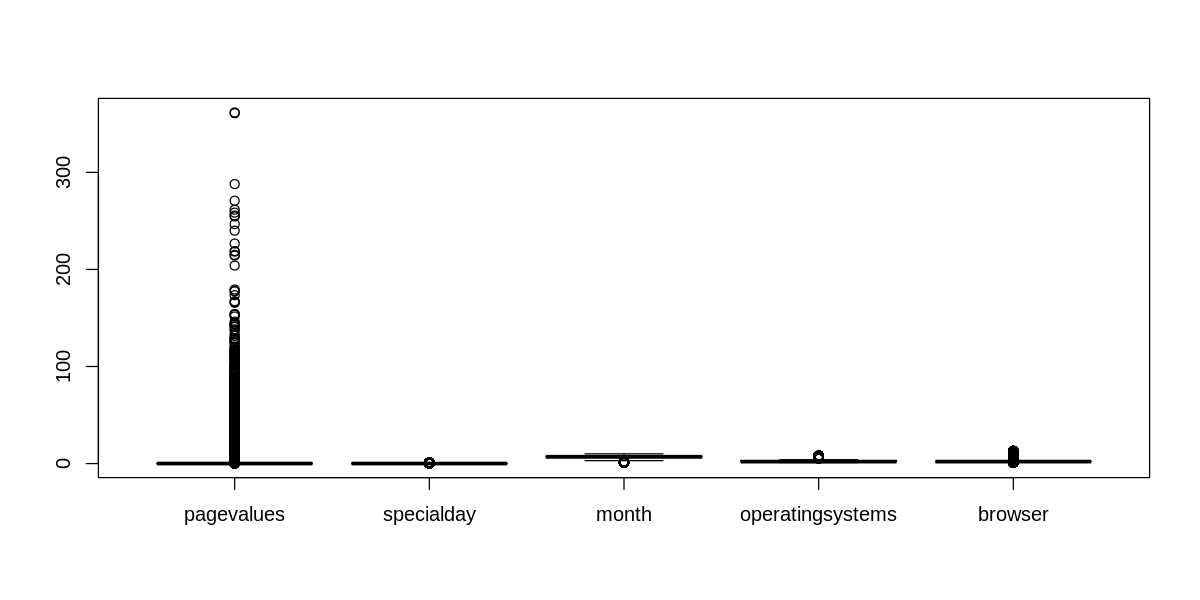

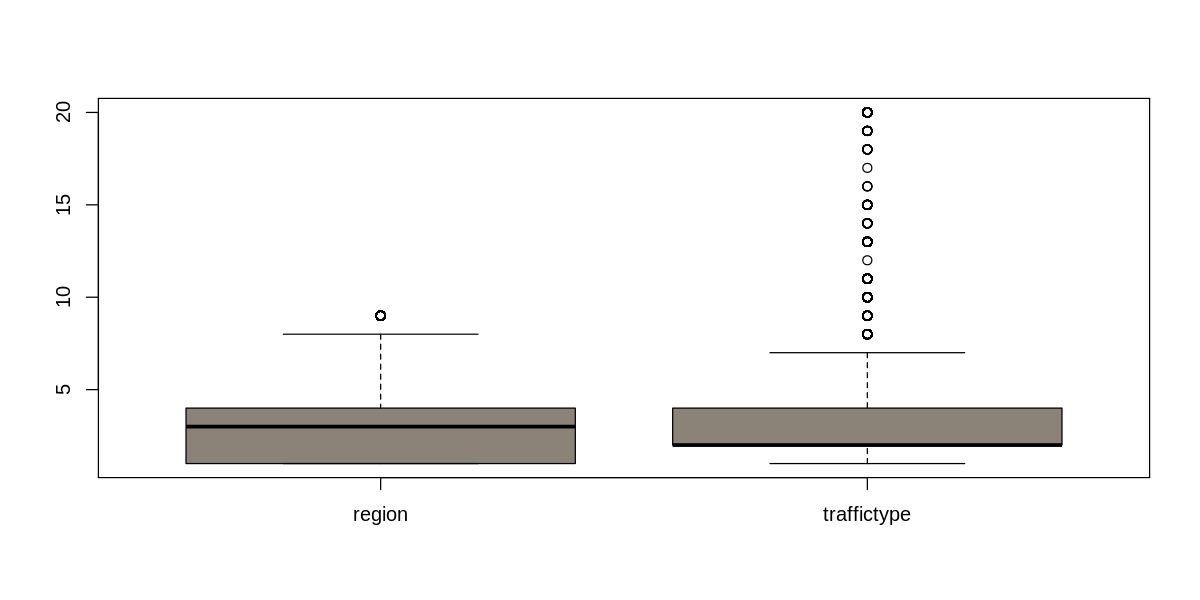

In [20]:
# checking for outliers in numerical columns
options(repr.plot.width=10, repr.plot.height=5)
boxplot(dup.free[, c(1:4)], col="cadetblue")
boxplot(dup.free[, c(5:8)], col="burlywood4")
boxplot(dup.free[, c(9:13)], col="coral4")
boxplot(dup.free[, c(14,15)], col="antiquewhite4")

The boxplot reveals the presence of numerous outliers in the columns. We will not drop the outliers however as customer preferences vary greatly. 

In [21]:
head(dup.free, 5)

administrative administrative_duration informational informational_duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
  productrelated productrelated_duration bouncerates exitrates pagevalues
1  1               0.000000              0.20        0.20      0         
2  2              64.000000              0.00        0.10      0         
3  1              -1.000000              0.20        0.20      0         
4  2               2.666667              0.05        0.14      0         
5 10             627.500000              0.02        0.05      0         
  specialday month operatingsystems browser region traffictype
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
  visitortype       weekend revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE

In [23]:
apply(commerce[, c(1,2,3,4,5,6,7,8,9,10)], 2, boxplot.stats)

$administrative
$administrative$stats
   1 6033 3993 1846 8309 
   0    0    1    4   10 

$administrative$n
[1] 12316

$administrative$conf
[1] 0.9430515 1.0569485

$administrative$out
   63   249   283   289   479   503   511   553   576   612   620   642   705 
   12    16    13    11    13    18    14    12    12    16    13    17    19 
  770   778   907   917   933   945   967   980  1106  1232  1278  1282  1363 
   15    11    11    12    13    11    14    11    15    11    11    11    12 
 1496  1510  1573  1580  1606  1679  1827  1902  1989  1990  2032  2046  2263 
   11    24    11    11    14    14    12    13    12    13    13    13    15 
 2285  2313  2429  2458  2474  2525  2565  2591  2600  2607  2618  2638  2758 
   12    15    11    11    14    11    12    19    24    12    12    14    12 
 2777  2822  2845  2906  2940  2968  3106  3144  3157  3170  3186  3261  3309 
   11    14    11    14    12    13    11    12    17    16    15    11    12 
 3399  3408  3430  3440  3492  3525  3681  3690  3813  3913  4028  4106  4115 
   11    15    12    11    14    16    12    11    12    14    13    15    11 
 4116  4131  4135  4174  4300  4317  4379  4399  4444  4510  4516  4522  4557 
   13    11    11    17    15    15    14    16    13    22    13    15    12 
 4602  4675  4682  4701  4789  4871  4904  4938  5010  5046  5052  5091  5153 
   11    11    16    13    12    12    11    24    13    18    12    12    17 
 5218  5402  5469  5498  5520  5527  5537  5562  5570  5598  5605  5731  5759 
   15    11    17    13    16    13    18    17    11    24    12    11    15 
 5783  5816  5830  5846  5862  5901  5903  5917  5918  5938  5972  5999  6031 
   12    16    11    11    11    12    14    12    15    11    12    13    12 
 6047  6067  6128  6137  6152  6191  6230  6242  6254  6272  6274  6305  6312 
   11    14    15    11    12    12    14    16    11    12    15    11    21 
 6325  6348  6414  6426  6455  6458  6463  6475  6488  6489  6501  6569  6602 
   11    11    11    11    13    15    11    14    14    15    13    14    18 
 6614  6641  6648  6675  6685  6690  6692  6714  6758  6766  6771  6792  6803 
   16    15    13    19    20    12    18    12    12    12    13    13    14 
 6821  6825  6832  6834  6853  6869  6871  6892  6898  6899  6906  6922  6937 
   13    19    11    11    11    11    14    11    11    14    17    11    14 
 6942  6943  6960  6970  6993  7037  7040  7046  7054  7074  7135  7155  7161 
   13    13    16    13    13    13    11    11    11    16    15    12    15 
 7169  7227  7236  7241  7273  7291  7308  7310  7315  7320  7363  7378  7385 
   12    11    18    13    14    13    11    15    15    11    13    16    12 
 7392  7409  7415  7425  7444  7450  7495  7505  7564  7577  7608  7670  7690 
   14    14    11    15    19    11    14    23    16    14    15    16    14 
 7729  7747  7759  7763  7764  7829  7872  7875  7894  7901  7912  7926  7954 
   11    14    11    13    15    23    13    11    12    11    11    12    12 
 7972  7977  8067  8126  8239  8249  8270  8275  8282  8285  8309  8350  8372 
   17    12    11    12    15    12    11    11    11    11    27    22    18 
 8390  8413  8483  8497  8498  8549  8558  8571  8586  8594  8619  8630  8656 
   12    14    12    13    12    12    12    13    11    12    11    15    17 
 8686  8771  8785  8817  8831  8834  8875  8902  8926  8966  8973  8997  9023 
   12    15    20    13    11    15    17    13    12    11    11    11    13 
 9070  9079  9083  9103  9123  9148  9157  9196  9224  9225  9239  9250  9251 
   18    23    11    22    15    13    11    11    13    11    15    16    12 
 9264  9280  9299  9333  9372  9395  9422  9508  9510  9559  9564  9572  9586 
   12    12    15    13    14    17    14    14    12    13    11    14    12 
 9675  9705  9710  9721  9728  9734  9740  9756  9781  9811  9846  9920  9940 
   11    16    12    17    13    13    17    13    13    12    13    11    14 
 9959  9960  9972  997

In [24]:
# getting unique values in the categrical columns 
cat_col = c(11,16,17,18)

for (column in cat_col) {
  print(unique(dup.free[column]))
  
}

     month
1      Feb
185    Mar
2092   May
5456   Oct
5457  June
5461   Jul
5463   Aug
5464   Nov
5469   Sep
7983   Dec
           visitortype
1    Returning_Visitor
94         New_Visitor
5680             Other
  weekend
1   FALSE
5    TRUE
   revenue
1    FALSE
66    TRUE


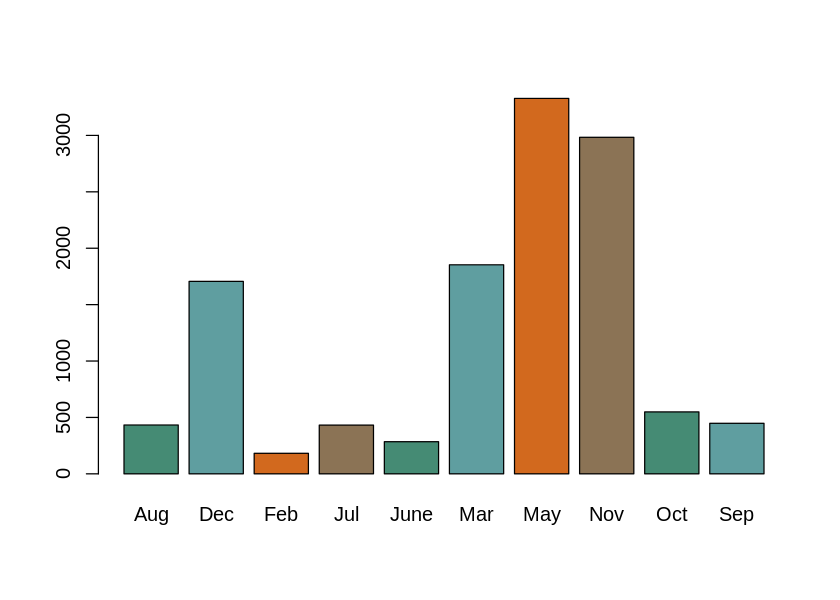

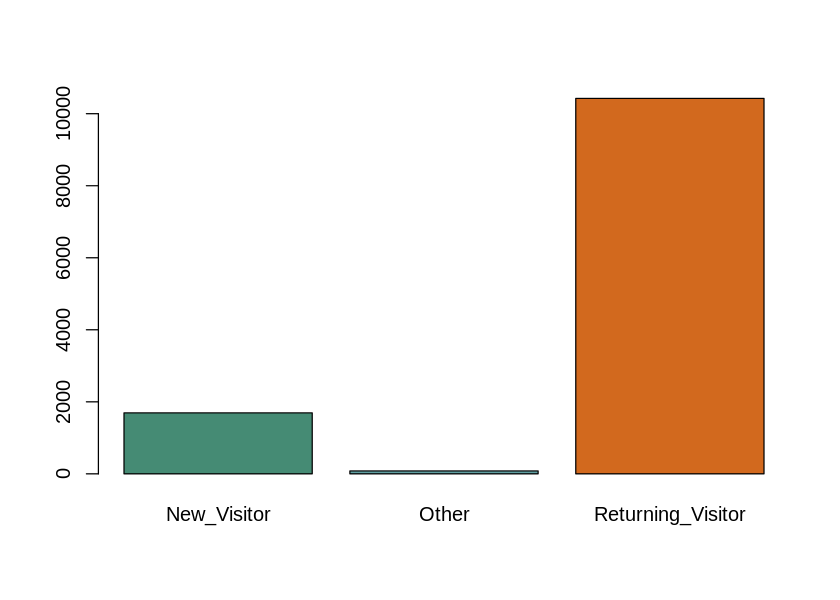

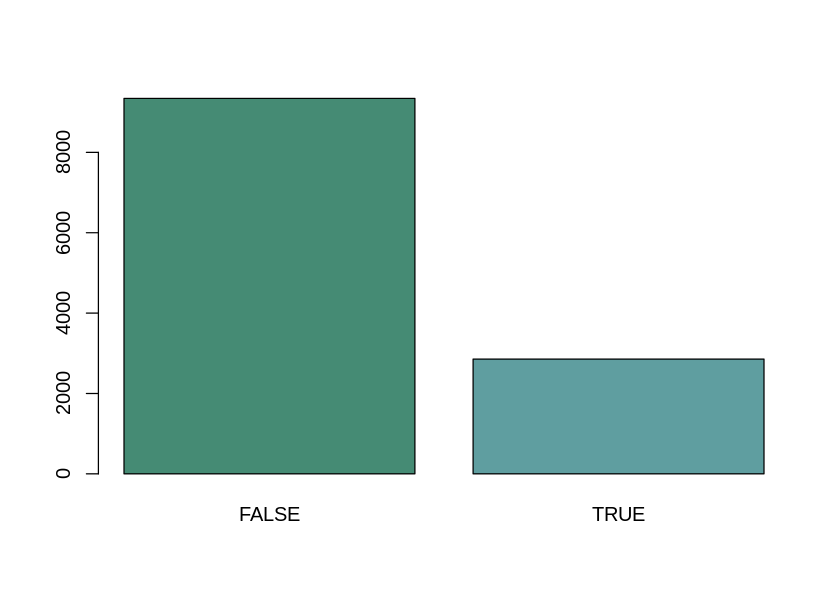

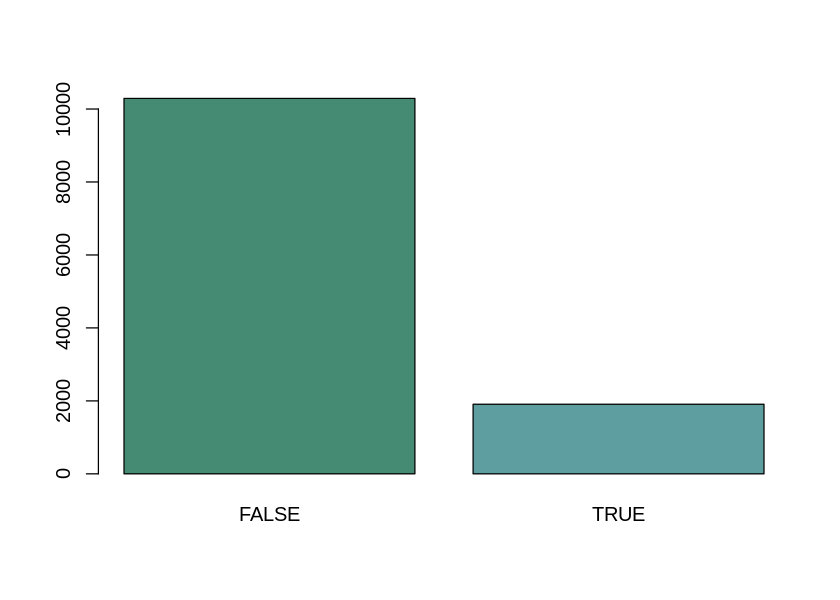

In [25]:
# plotting the distribution of unique values
# cat_col = month, visitortype, weekend, revenue
for (col in cat_col) {
  
  options(repr.plot.width=7, repr.plot.height=5)
  barplot(table(dup.free[, col]), col=c("aquamarine4", "cadetblue", "chocolate", "burlywood4"))
}

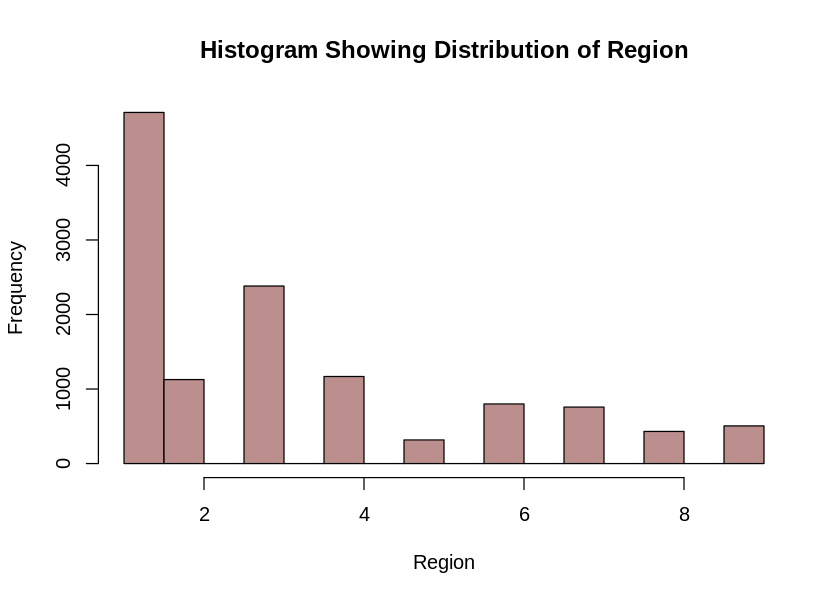

In [26]:
hist(dup.free$region, col = "rosybrown", main = "Histogram Showing Distribution of Region", xlab = "Region")

In [28]:
com.num <- data.matrix(data.frame(unclass(dup.free)))
head(com.num)

administrative administrative_duration informational
[1,] 0               0                      0            
[2,] 0               0                      0            
[3,] 0              -1                      0            
[4,] 0               0                      0            
[5,] 0               0                      0            
[6,] 0               0                      0            
     informational_duration productrelated productrelated_duration bouncerates
[1,]  0                      1               0.000000              0.20000000 
[2,]  0                      2              64.000000              0.00000000 
[3,] -1                      1              -1.000000              0.20000000 
[4,]  0                      2               2.666667              0.05000000 
[5,]  0                     10             627.500000              0.02000000 
[6,]  0                     19             154.216667              0.01578947 
     exitrates pagevalues specialday month operatingsystems browser region
[1,] 0.2000000 0          0          3     1                1       1     
[2,] 0.1000000 0          0          3     2                2       1     
[3,] 0.2000000 0          0          3     4                1       9     
[4,] 0.1400000 0          0          3     3                2       2     
[5,] 0.0500000 0          0          3     3                3       1     
[6,] 0.0245614 0          0          3     2                2       1     
     traffictype visitortype weekend revenue
[1,] 1           3           0       0      
[2,] 2           3           0       0      
[3,] 3           3           0       0      
[4,] 4           3           0       0      
[5,] 4           3           1       0      
[6,] 3           3           0       0

In [29]:
com.feat <- com.num[, c(1:17)]
com.class <- com.num[, "revenue"]
#
head(com.feat)

administrative administrative_duration informational
[1,] 0               0                      0            
[2,] 0               0                      0            
[3,] 0              -1                      0            
[4,] 0               0                      0            
[5,] 0               0                      0            
[6,] 0               0                      0            
     informational_duration productrelated productrelated_duration bouncerates
[1,]  0                      1               0.000000              0.20000000 
[2,]  0                      2              64.000000              0.00000000 
[3,] -1                      1              -1.000000              0.20000000 
[4,]  0                      2               2.666667              0.05000000 
[5,]  0                     10             627.500000              0.02000000 
[6,]  0                     19             154.216667              0.01578947 
     exitrates pagevalues specialday month operatingsystems browser region
[1,] 0.2000000 0          0          3     1                1       1     
[2,] 0.1000000 0          0          3     2                2       1     
[3,] 0.2000000 0          0          3     4                1       9     
[4,] 0.1400000 0          0          3     3                2       2     
[5,] 0.0500000 0          0          3     3                3       1     
[6,] 0.0245614 0          0          3     2                2       1     
     traffictype visitortype weekend
[1,] 1           3           0      
[2,] 2           3           0      
[3,] 3           3           0      
[4,] 4           3           0      
[5,] 4           3           1      
[6,] 3           3           0

In [30]:
# previewing the class column
head(com.class)

[1] 0 0 0 0 0 0

In [0]:
normalize <- function(x){
  return ((x - min(x)) / (max(x) - min(x)))
}

In [32]:
nom.col <- c(1:17)

for (col in nom.col){
  com.feat[, col] <- normalize(com.feat[, col])
}

head(com.feat)

administrative administrative_duration informational
[1,] 0              0.0002941393            0            
[2,] 0              0.0002941393            0            
[3,] 0              0.0000000000            0            
[4,] 0              0.0002941393            0            
[5,] 0              0.0002941393            0            
[6,] 0              0.0002941393            0            
     informational_duration productrelated productrelated_duration bouncerates
[1,] 0.0003920992           0.001418440    1.563122e-05            1.00000000 
[2,] 0.0003920992           0.002836879    1.016029e-03            0.00000000 
[3,] 0.0000000000           0.001418440    0.000000e+00            1.00000000 
[4,] 0.0003920992           0.002836879    5.731448e-05            0.25000000 
[5,] 0.0003920992           0.014184397    9.824223e-03            0.10000000 
[6,] 0.0003920992           0.026950355    2.426226e-03            0.07894737 
     exitrates pagevalues specialday month     operatingsystems browser   
[1,] 1.000000  0          0          0.2222222 0.0000000        0.00000000
[2,] 0.500000  0          0          0.2222222 0.1428571        0.08333333
[3,] 1.000000  0          0          0.2222222 0.4285714        0.00000000
[4,] 0.700000  0          0          0.2222222 0.2857143        0.08333333
[5,] 0.250000  0          0          0.2222222 0.2857143        0.16666667
[6,] 0.122807  0          0          0.2222222 0.1428571        0.08333333
     region traffictype visitortype weekend
[1,] 0.000  0.00000000  1           0      
[2,] 0.000  0.05263158  1           0      
[3,] 1.000  0.10526316  1           0      
[4,] 0.125  0.15789474  1           0      
[5,] 0.000  0.15789474  1           1      
[6,] 0.000  0.10526316  1           0

In [34]:
set.seed(123)
kres <- kmeans(com.feat, 3)

# previewing the no. of records in each cluster
kres$size

[1] 9560  916 1723

In [35]:
# getting the values of cluster centers
kres$centers

administrative administrative_duration informational informational_duration
1 0.093200837    0.0259754653            0.0244595537  0.0164592426          
2 0.002062106    0.0007832368            0.0007732897  0.0004208646          
3 0.095397777    0.0276480491            0.0139775585  0.0079407587          
  productrelated productrelated_duration bouncerates exitrates  pagevalues
1 0.052889700    0.022161955             0.050353125 0.16313658 0.01527273
2 0.004750844    0.001049354             0.817543514 0.89239325 0.00000000
3 0.025970701    0.010223583             0.009810139 0.08942449 0.03175644
  specialday month     operatingsystems browser   region    traffictype
1 0.06351464 0.5793933 0.1580544        0.1100854 0.2630492 0.1538703  
2 0.12576419 0.5612567 0.1706176        0.1099891 0.2651474 0.2241439  
3 0.01950087 0.5523957 0.1695548        0.1320371 0.3052089 0.1728014  
  visitortype weekend  
1 0.99937238  0.2329498
2 0.96397380  0.1637555
3 0.01654092  0.2780035

In [36]:
sample(kres$cluster, 10)

[1] 1 3 2 1 1 1 1 1 3 1

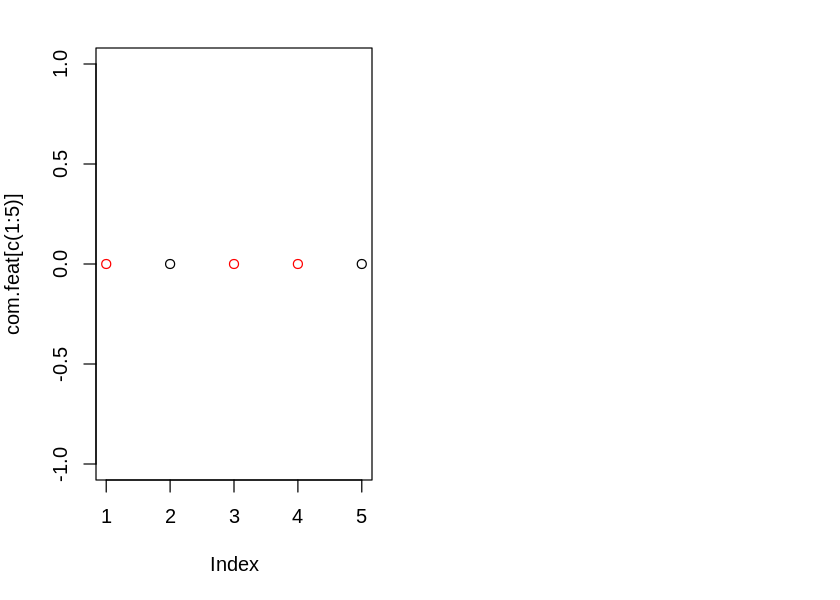

In [37]:
par(mfrow = c(1,2), mar=c(5,4,2,2))
plot(com.feat[c(1:5)], col=kres$cluster)

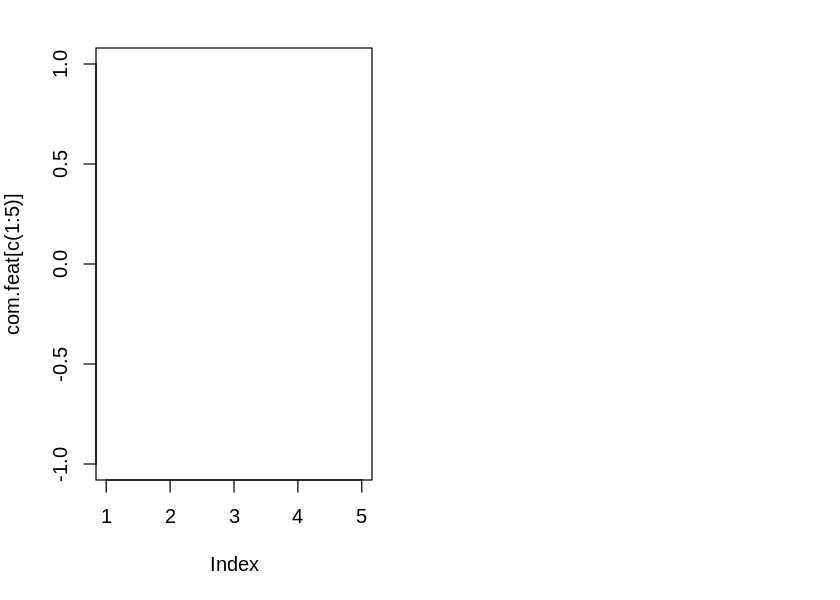

In [38]:
par(mfrow = c(1,2), mar=c(5,4,2,2))
plot(com.feat[c(1:5)], col=com.class)

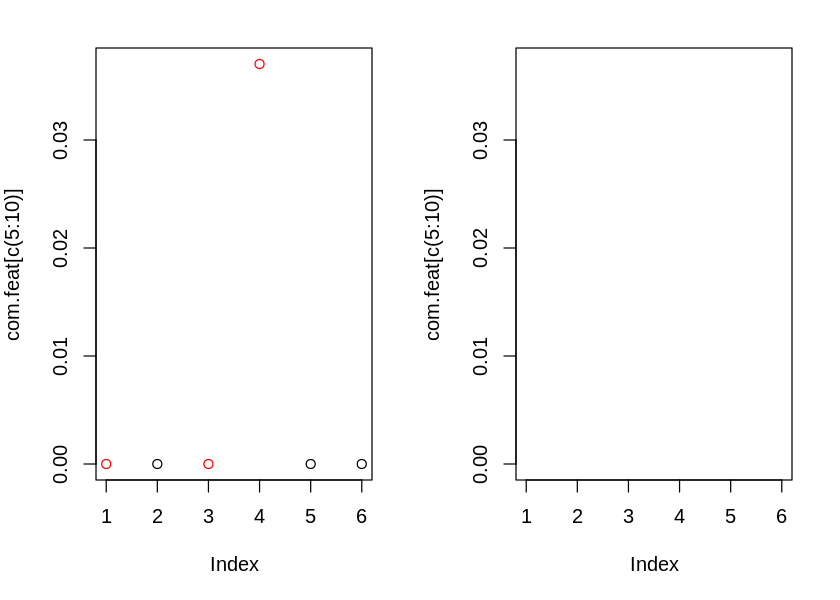

In [39]:
par(mfrow = c(1,2), mar=c(5,4,2,2))
plot(com.feat[c(5:10)], col=kres$cluster)
plot(com.feat[c(5:10)], col=com.class)

In [40]:
table(kres$cluster, com.class)

   com.class
       0    1
  1 8095 1465
  2  910    6
  3 1286  437

In [0]:
dis <- dist(com.feat, method="euclidean")

hclus <- hclust(dis, method="ward.D2")

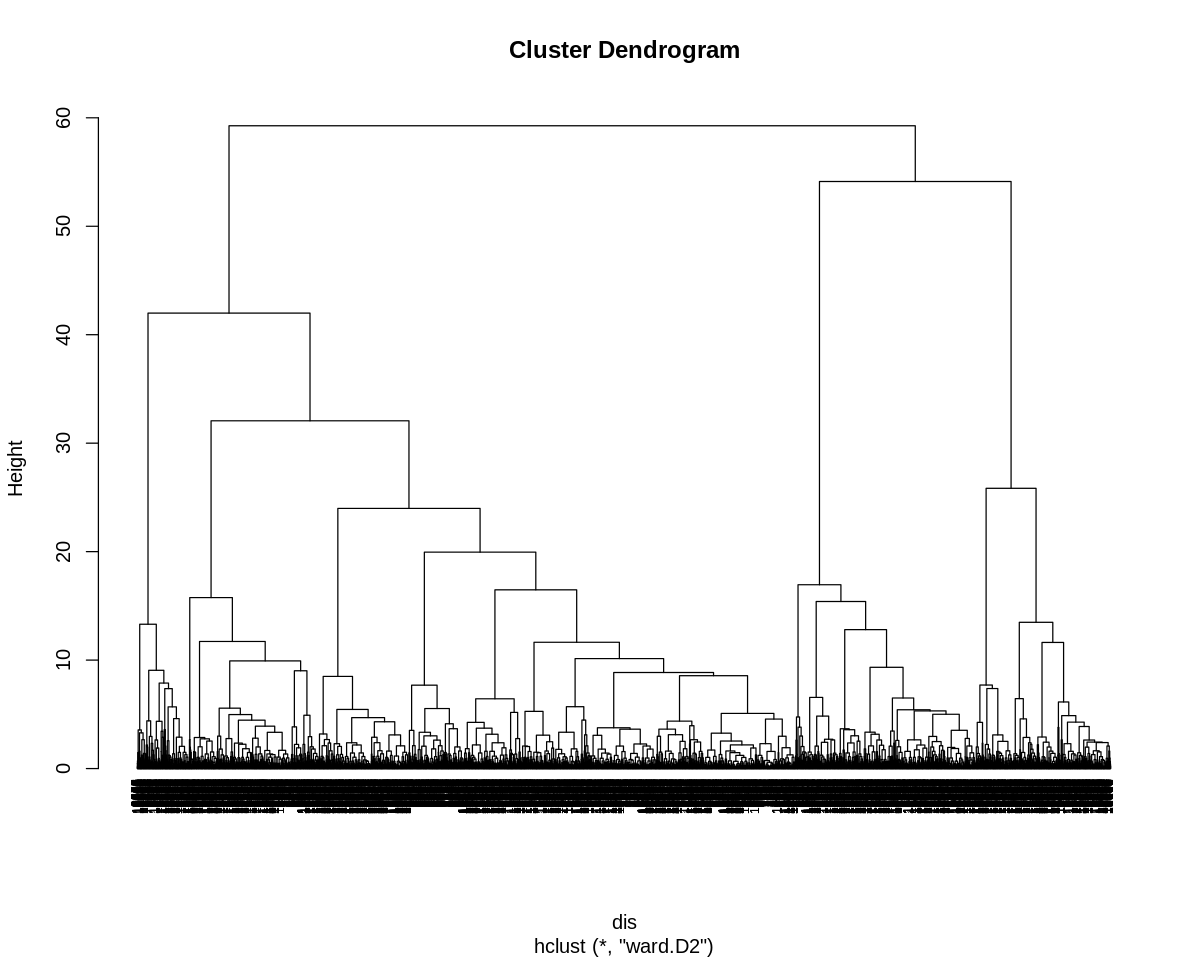

In [43]:
options(repr.plot.width=10, repr.plot.height=8)
plot(hclus, cex=0.6, hang=-2)

In [44]:
com.pca <- prcomp(com.feat, center = TRUE, scale. = TRUE)
summary(com.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8419 1.3445 1.17602 1.08676 1.03789 1.01238 0.98900
Proportion of Variance 0.1996 0.1063 0.08135 0.06947 0.06337 0.06029 0.05754
Cumulative Proportion  0.1996 0.3059 0.38725 0.45672 0.52009 0.58038 0.63791
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     0.97717 0.96615 0.93509 0.91878 0.89899 0.8707 0.64989
Proportion of Variance 0.05617 0.05491 0.05143 0.04966 0.04754 0.0446 0.02484
Cumulative Proportion  0.69408 0.74899 0.80042 0.85008 0.89762 0.9422 0.96706
                          PC15    PC16    PC17
Standard deviation     0.59337 0.35182 0.28991
Proportion of Variance 0.02071 0.00728 0.00494
Cumulative Proportion  0.98778 0.99506 1.00000

$sdev
 [1] 1.8418826 1.3444880 1.1760245 1.0867594 1.0378939 1.0123803 0.9890023
 [8] 0.9771656 0.9661469 0.9350898 0.9187767 0.8989912 0.8707422 0.6498877
[15] 0.5933727 0.3518152 0.2899059

$rotation
                                 PC1         PC2          PC3         PC4
administrative           0.381249076 -0.02881053  0.046780224  0.17658197
administrative_duration  0.328106855 -0.07200041  0.058573469  0.24075716
informational            0.348170119 -0.23906401 -0.008126580  0.25185368
informational_duration   0.296493893 -0.25391252 -0.003726236  0.27383237
productrelated           0.411401814 -0.17868060  0.024107179 -0.30840614
productrelated_duration  0.413201144 -0.21005214  0.032008888 -0.26081987
bouncerates             -0.271839820 -0.55324640  0.028018418  0.21353353
exitrates               -0.320806727 -0.53693651  0.010710739  0.17667886
pagevalues               0.091107294  0.19806242  0.143605055  0.14445353
specialday              -0.075704836 -0.15224929  0.011897450 -0.43922988
month                    0.042937825 -0.03307921 -0.054591592 -0.38380301
operatingsystems        -0.015657473 -0.02472663  0.594295617 -0.06603961
browser                 -0.020121164  0.04538317  0.550462606 -0.04167693
region                  -0.024758272  0.05712940  0.302254152  0.13185868
traffictype             -0.054740102 -0.08424146  0.462903410 -0.09356421
visitortype              0.005134011 -0.34926760 -0.059987348 -0.36443628
weekend                  0.030037419  0.05839168 -0.051177840  0.07962148
                                PC5         PC6         PC7         PC8
administrative          -0.14935879  0.36002299 -0.08533947  0.09865822
administrative_duration -0.17897964  0.43121565 -0.08950831  0.13450217
informational           -0.04593599 -0.37012651  0.18895047  0.13453101
informational_duration  -0.02731990 -0.47948197  0.24944085  0.15461581
productrelated           0.15254452  0.08997154 -0.13908488 -0.19455908
productrelated_duration  0.15277011  0.07213292 -0.11814349 -0.18134405
bouncerates             -0.09834247  0.18574221 -0.03949908 -0.10816909
exitrates               -0.05488274  0.13197111 -0.02807189 -0.07247480
pagevalues              -0.21991614  0.12747600  0.37420144 -0.31489820
specialday              -0.21529349 -0.16456442  0.18053366  0.42678075
month                   -0.59981984  0.11660634  0.08187900  0.16486031
operatingsystems         0.01636850 -0.12066133 -0.03642884 -0.16949156
browser                  0.20364798 -0.06137021  0.07890067 -0.05210705
region                   0.13564854  0.04316196 -0.44425030  0.63224902
traffictype             -0.33872978  0.00246600  0.08811464 -0.06125590
visitortype              0.25299176 -0.03293184 -0.10451402 -0.05753513
weekend                 -0.43603666 -0.41727416 -0.66948514 -0.30944060
                                PC9         PC10        PC11         PC12
administrative          -0.20517965  0.131842054 -0.06557168  0.148694836
administrative_duration -0.27677500  0.183494827 -0.08699701  0.171737465
informational            0.01612791 -0.084986998 -0.03856110  0.053400834
informational_duration   0.04108466 -0.109019450 -0.04660560  0.008224357
productrelated           0.16712623  0.015113993  0.12115717 -0.282232545
productrelated_duration  0.16797322  0.003472012  0.11498270 -0.296257806
bouncerates              0.13324509  0.072922065 -0.03422273 -0.144827059
exitrates                0.09405322  0.055931008 -0.04716492 -0.097413915
pagevalues               0.64139323  0.286125623  0.16870435  0.284203039
specialday              -0.09861961  0.668277026  0.16283345 -0.062532182
month                    0.22176563 -0.409074486 -0.46342322 -0.040441684
operatingsystems        -0.20221938 -0.020988627 -0.09312460  0.076489286
browser                  0.02967292  0.203259729 -0.56462142 -0.095520789
region                   0.48088524 -0.104451215  0.15695324  0.037447129
traffictype             -0.22700898 -0.330831381  0.57183942

In [45]:
str(com.pca)

List of 5
 $ sdev    : num [1:17] 1.84 1.34 1.18 1.09 1.04 ...
 $ rotation: num [1:17, 1:17] 0.381 0.328 0.348 0.296 0.411 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:17] "administrative" "administrative_duration" "informational" "informational_duration" ...
  .. ..$ : chr [1:17] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:17] 0.0867 0.0243 0.0212 0.0141 0.0455 ...
  ..- attr(*, "names")= chr [1:17] "administrative" "administrative_duration" "informational" "informational_duration" ...
 $ scale   : Named num [1:17] 0.1234 0.0522 0.0532 0.0555 0.0633 ...
  ..- attr(*, "names")= chr [1:17] "administrative" "administrative_duration" "informational" "informational_duration" ...
 $ x       : num [1:12199, 1:17] -3.33 -1.46 -3.5 -2.1 -1.02 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:17] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [48]:
library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis


digest (0.6.21 -> 0.6.22) [CRAN]
rlang  (0.4.0  -> 0.4.1 ) [CRAN]


Installing 2 packages: digest, rlang
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


✔  checking for file ‘/tmp/RtmpcbwpGO/remotes7a75716670/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


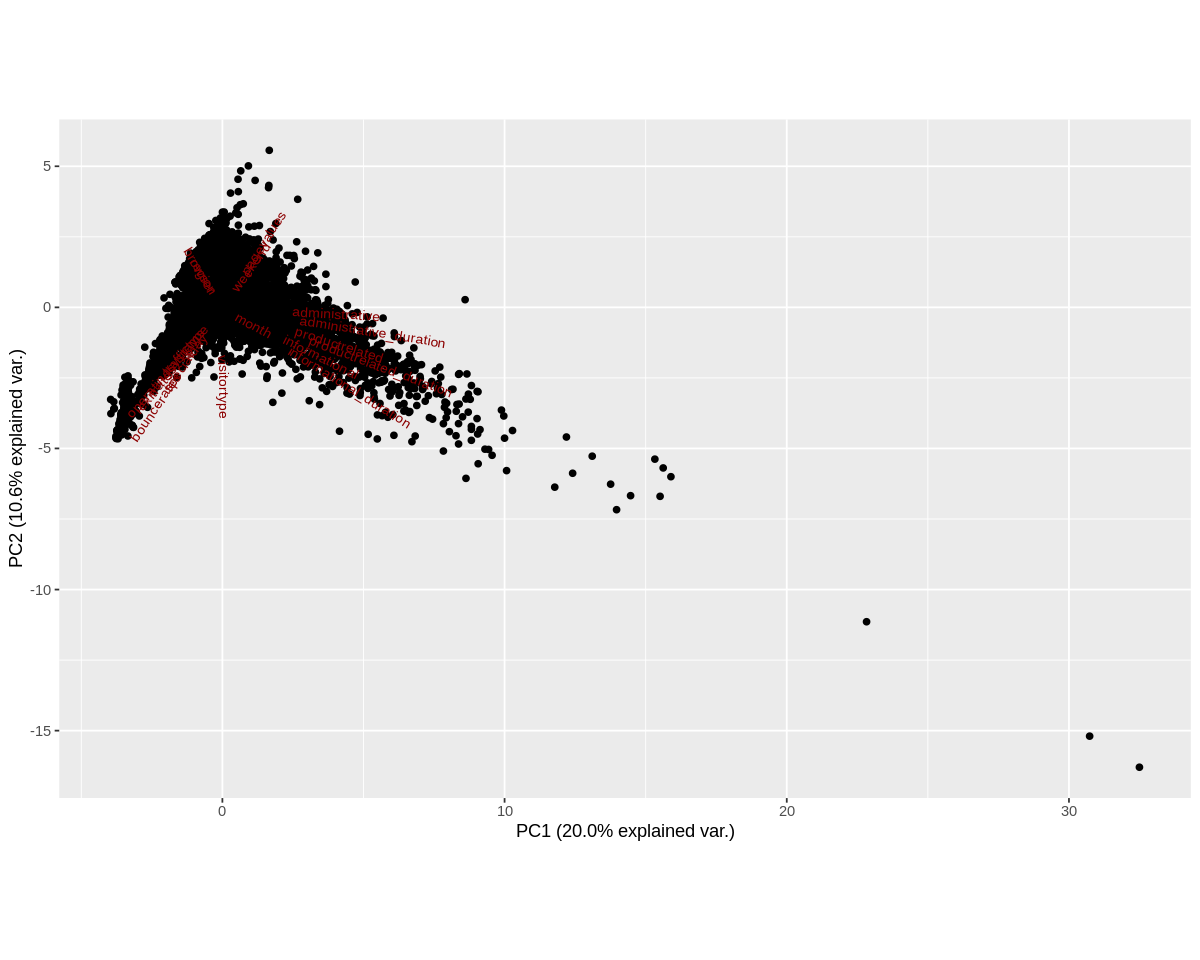

In [53]:
# loading the ggbiplot library
library(ggbiplot)
ggbiplot(com.pca, labels=rownames(com.feat), obs.scale=1,var.scale=1)

In [0]:
label <- dup.free$revenue
dup.free$revenue <- as.factor(dup.free$revenue)

In [0]:
colors = rainbow(length(unique(dup.free$revenue)))
names(colors) = unique(dup.free$revenue)

In [59]:
# getting duration of execution
library(Rtsne)
tsne <- Rtsne(dup.free[, -1], dims=2, perplexity=30, verbose=TRUE, max_iter=500)

Performing PCA
Read the 12199 x 27 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 12199
Done in 1.85 seconds (sparsity = 0.009536)!
Learning embedding...
Iteration 50: error is 100.531190 (50 iterations in 2.46 seconds)
Iteration 100: error is 83.761936 (50 iterations in 2.66 seconds)
Iteration 150: error is 76.192415 (50 iterations in 2.57 seconds)
Iteration 200: error is 72.592085 (50 iterations in 2.61 seconds)
Iteration 250: error is 70.925241 (50 iterations in 2.66 seconds)
Iteration 300: error is 2.606853 (50 iterations in 2.42 seconds)
Iteration 350: error is 2.186390 (50 iterations in 2.37 seconds)
Iteration 400: error is 1.915906 (50 iterations in 2.33 seconds)
Iteration 450: error is 1.724794 (50 iterations in 2.34 seconds)
Iteration 500: error is 1.584078 (50 iterations in 2.36 seconds)
Fitting performed in 24.78 seconds.


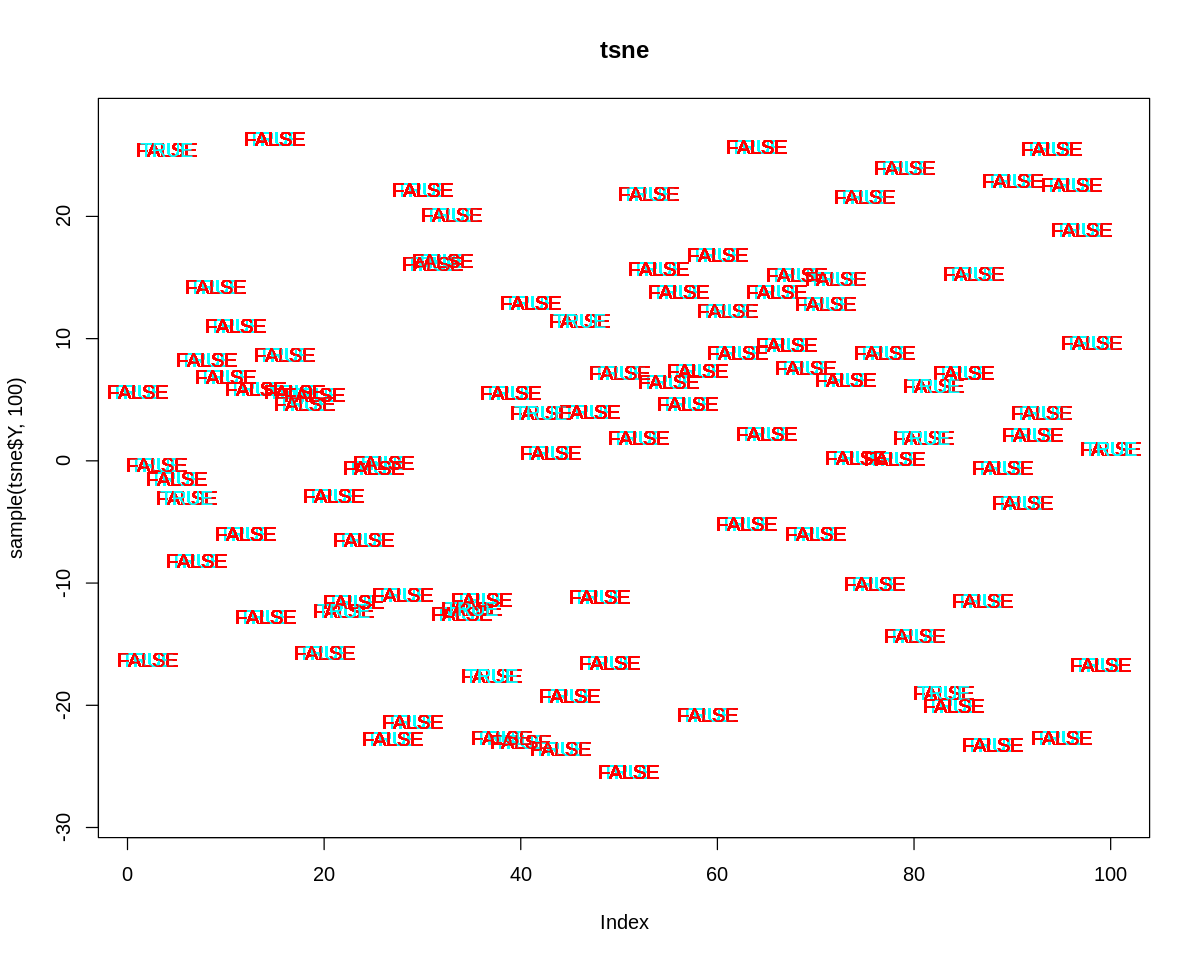

In [63]:
plot(sample(tsne$Y, 100), t='n', main="tsne")
text(sample(tsne$Y, 100), labels=dup.free$revenue, col=colors[dup.free$revenue])